<a href="https://colab.research.google.com/github/itsmenisha/Codesoft/blob/main/MOVIE_RATING_PREDICTION_WITH_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MOVIE RATING PREDICTION WITH PYTHON


In [1]:
# import libaries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 1. Cleaning and inputed the data

In [6]:
# read the data
movie_data = pd.read_csv(r"IMDb Movies India.csv",encoding="latin1")
movie_data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [8]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [9]:
movie_data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


### Cleaning the data

In [10]:
# check missing value or NULL values
movie_data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [11]:
movie_data.dropna(subset=["Rating"], inplace = True)
movie_data.isnull().sum()

Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

In [12]:
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


### Convert votes to integer and remove commas and convert year (2019) to 2019 and remove min from duration columns

In [13]:
# convert votes columns
movie_data['Votes'] = movie_data['Votes'].str.replace(',','').astype(int)


# convert year columns
movie_data['Year'] = movie_data['Year'].str.strip('()').astype(int)


# convert duration columns
movie_data['Duration'] = movie_data['Duration'].str.strip('min')


movie_data['Duration'].fillna(movie_data['Duration'].median(),inplace=True)


movie_data.isnull().sum()

Name          0
Year          0
Duration      0
Genre       102
Rating        0
Votes         0
Director      5
Actor 1     125
Actor 2     200
Actor 3     292
dtype: int64

In [14]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7919 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7919 non-null   object 
 1   Year      7919 non-null   int64  
 2   Duration  7919 non-null   object 
 3   Genre     7817 non-null   object 
 4   Rating    7919 non-null   float64
 5   Votes     7919 non-null   int64  
 6   Director  7914 non-null   object 
 7   Actor 1   7794 non-null   object 
 8   Actor 2   7719 non-null   object 
 9   Actor 3   7627 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 680.5+ KB


In [15]:
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


###Now data are clean and inputed.
## 2. EDA (Exploratory data Analysis)

In [16]:
# find top 10 movies based on rating
top_movie = movie_data.loc[movie_data['Rating'].sort_values(ascending=False)[:10].index]
top_movie

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,2020,94,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,2021,79,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2563,Breed,2020,134.0,Drama,9.6,48,Bobby Kumar,Bobby Kumar,Ashfaq,Fasih Choudhry
11704,Ram-Path,2017,134.0,Documentary,9.4,5,Ashish Dubey,Ishan Jacob,NaN,NaN
14222,The Reluctant Crime,2020,113,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
6852,June,2021,93,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
5077,Gho Gho Rani,2019,105,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
1314,Ashok Vatika,2018,97,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
5125,God of gods,2019,90,Documentary,9.3,46,Venkatesh Bk,Tejaswini Manogna,Triyug Mantri,Raj Singh Verma
12673,Secrets of Sinauli,2021,56,"Documentary, History",9.3,1373,Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit


### Distribution of Top 10 movies with respect to Yea

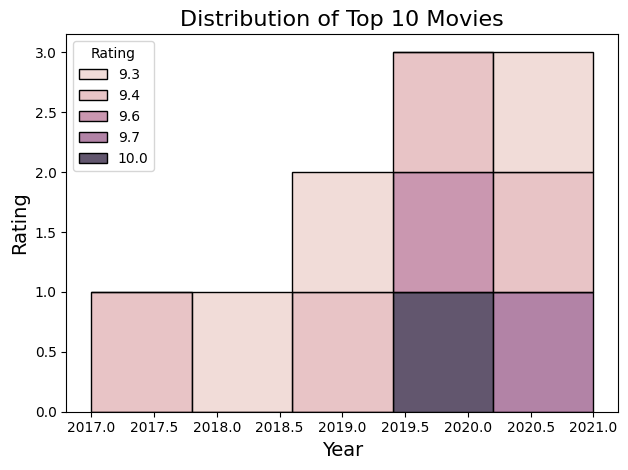

In [17]:
sns.histplot(data=top_movie, x="Year",hue="Rating", multiple="stack")
plt.title('Distribution of Top 10 Movies', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.tight_layout()
plt.show()

###Distribution of Genre of movies

In [18]:
genre_counts = movie_data['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Select the top N genres (e.g., top 5)
top_n_genres = genre_counts.head(5)
top_n_genres

,Genre,Count
0,Drama,1177
1,"Drama, Romance",447
2,"Action, Crime, Drama",417
3,Action,417
4,"Drama, Family",291


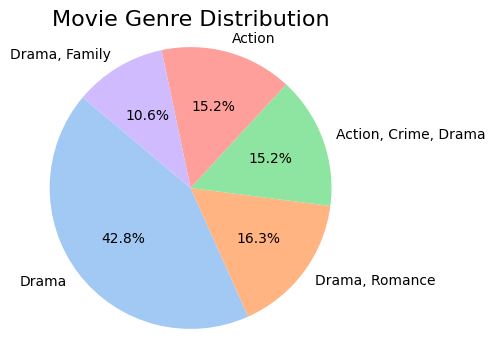

In [19]:
plt.figure(figsize=(4, 4))
plt.pie(top_n_genres['Count'], labels=top_n_genres['Genre'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Movie Genre Distribution', fontsize=16)
plt.axis('equal')
plt.show()


###Distribution of Top directors by average rating

In [20]:
# Group the data by director and calculate the average rating
director_avg_rating = movie_data.groupby('Director')['Rating'].mean().reset_index()

director_avg_rating = director_avg_rating.sort_values(by='Rating', ascending=False)

top_directors = director_avg_rating.head(10)
top_directors

,Director,Rating
2385,Saif Ali Sayeed,10.0
2720,Sriram Raja,9.7
538,Bobby Kumar,9.6
348,Arvind Pratap,9.4
363,Ashish Dubey,9.4
2763,Suhrud Godbole,9.4
1611,Munni Pankaj,9.4
2984,Venkatesh Bk,9.3
3080,Vishwa Bhanu,9.3
1987,Raghav Jairath,9.3


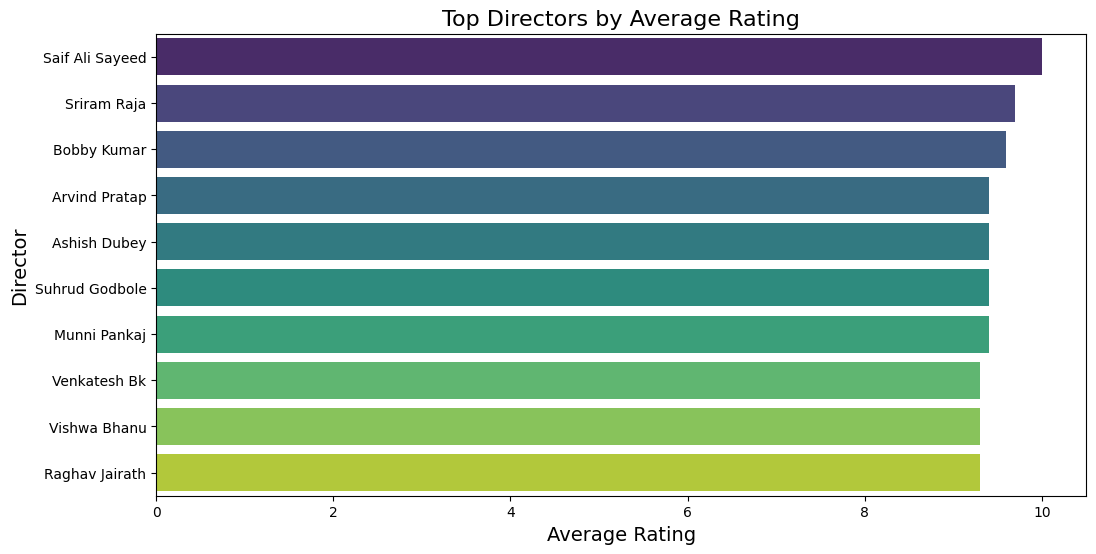

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_directors, x='Rating',y = 'Director', hue='Director', palette='viridis', legend = False)

plt.title('Top Directors by Average Rating', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Director', fontsize=14)

plt.show()

###Relationship between the number of votes and movie ratings

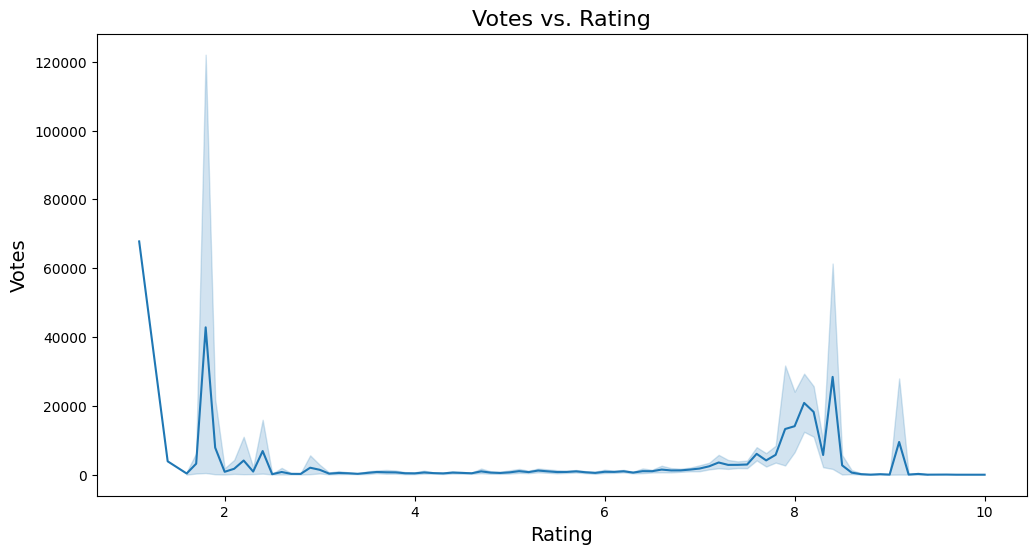

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=movie_data, x='Rating', y='Votes')

plt.title('Votes vs. Rating', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Votes', fontsize=14)

plt.show()

###Distribution of top actors by number of movie

In [23]:
actor_counts = movie_data['Actor 1'].value_counts().reset_index()
actor_counts.columns = ['Actor', 'MovieCount']

top_n_actors = actor_counts.head(10)
top_n_actors

,Actor,MovieCount
0,Jeetendra,140
1,Dharmendra,134
2,Mithun Chakraborty,130
3,Ashok Kumar,125
4,Rajesh Khanna,118
5,Amitabh Bachchan,117
6,Dev Anand,91
7,Shashi Kapoor,88
8,Akshay Kumar,82
9,Sanjay Dutt,73


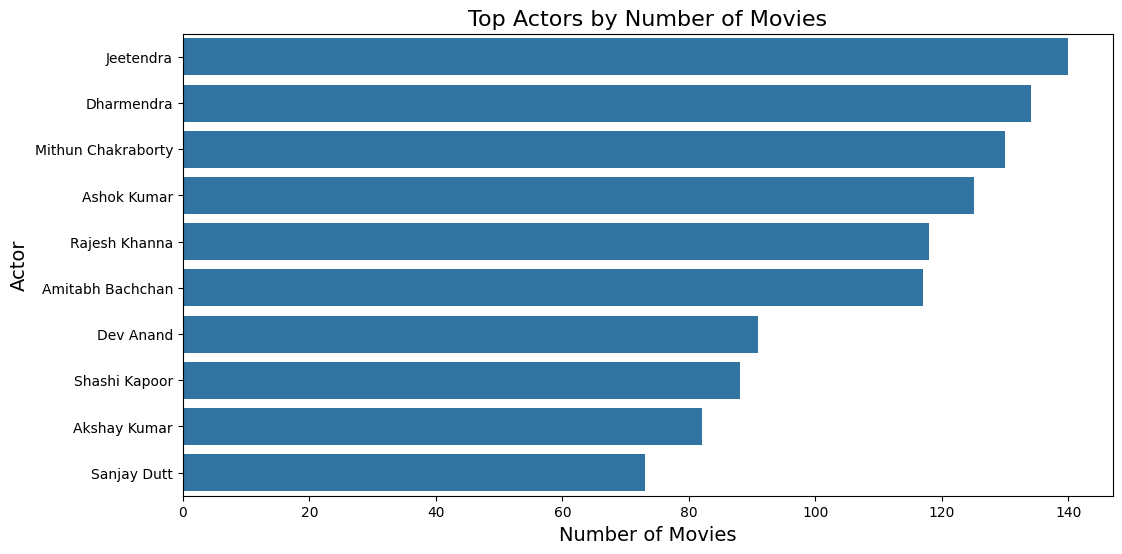

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_n_actors, x='MovieCount', y='Actor', orient='h')

# Set plot labels and title
plt.title('Top Actors by Number of Movies', fontsize=16)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Actor', fontsize=14)

# Show the plot
plt.show()

###Distribution of number of movie released every year

In [25]:
yearly_movie_counts = movie_data['Year'].value_counts().reset_index()
yearly_movie_counts.columns = ['Year', 'MovieCount']

yearly_movie_counts = yearly_movie_counts.sort_values(by='Year')
yearly_movie_counts

,Year,MovieCount
91,1917,1
90,1931,3
86,1932,6
87,1933,5
88,1934,5
...,...,...
1,2017,236
2,2018,228
0,2019,249
9,2020,167


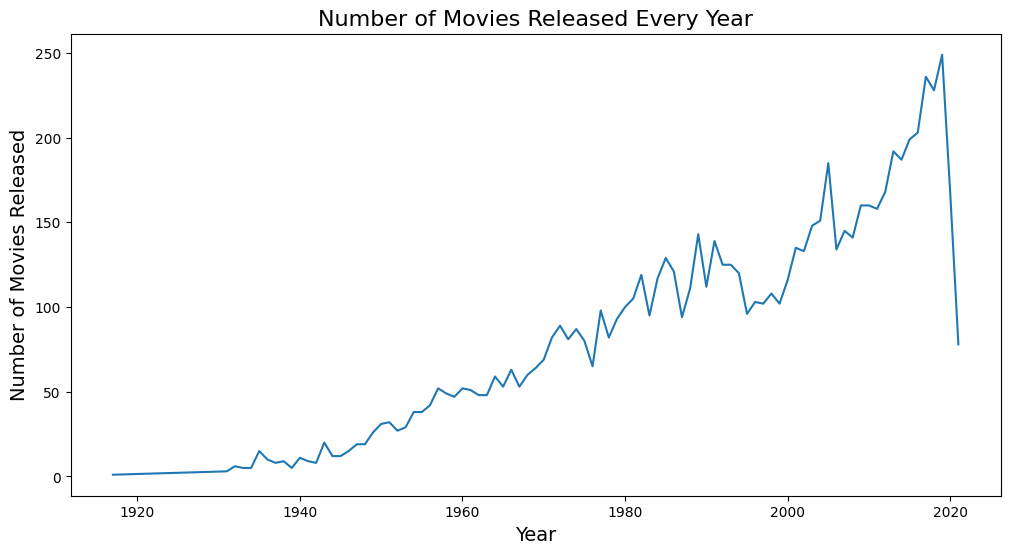

In [26]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_movie_counts, x='Year', y='MovieCount')

plt.title('Number of Movies Released Every Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies Released', fontsize=14)

plt.show()

###Distribution of Movies with rating greater than 8 and votes greater than 10000

In [27]:
filtered_df = movie_data[(movie_data['Rating'] > 8) & (movie_data['Votes'] > 10000)]
filtered_df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
75,3 Idiots,2009,170,"Comedy, Drama",8.4,357889,Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh
173,A Wednesday,2008,104,"Action, Crime, Drama",8.1,75118,Neeraj Pandey,Anupam Kher,Naseeruddin Shah,Jimmy Sheirgill
981,Anand,1971,122,"Drama, Musical",8.3,31937,Hrishikesh Mukherjee,Rajesh Khanna,Amitabh Bachchan,Sumita Sanyal
1009,Andaz Apna Apna,1994,160,"Action, Comedy, Romance",8.1,50810,Rajkumar Santoshi,Aamir Khan,Salman Khan,Raveena Tandon
1019,Andhadhun,2018,139,"Crime, Drama, Music",8.2,77901,Sriram Raghavan,Ayushmann Khurrana,Tabu,Radhika Apte
1285,Article 15,2019,130,"Crime, Drama, Mystery",8.2,25706,Anubhav Sinha,Ayushmann Khurrana,Nassar,Manoj Pahwa
1877,Barfi!,2012,151,"Comedy, Drama, Romance",8.1,77377,Anurag Basu,Ranbir Kapoor,Priyanka Chopra Jonas,Ileana D'Cruz
2065,Bhaag Milkha Bhaag,2013,186,"Biography, Drama, Sport",8.2,62636,Rakeysh Omprakash Mehra,Farhan Akhtar,Sonam Kapoor,Pawan Malhotra
2412,Black,2005,122,Drama,8.2,33782,Sanjay Leela Bhansali,Amitabh Bachchan,Rani Mukerji,Shernaz Patel
2425,Black Friday,2004,143,"Action, Crime, Drama",8.5,19493,Anurag Kashyap,Kay Kay Menon,Pawan Malhotra,Aditya Srivastav


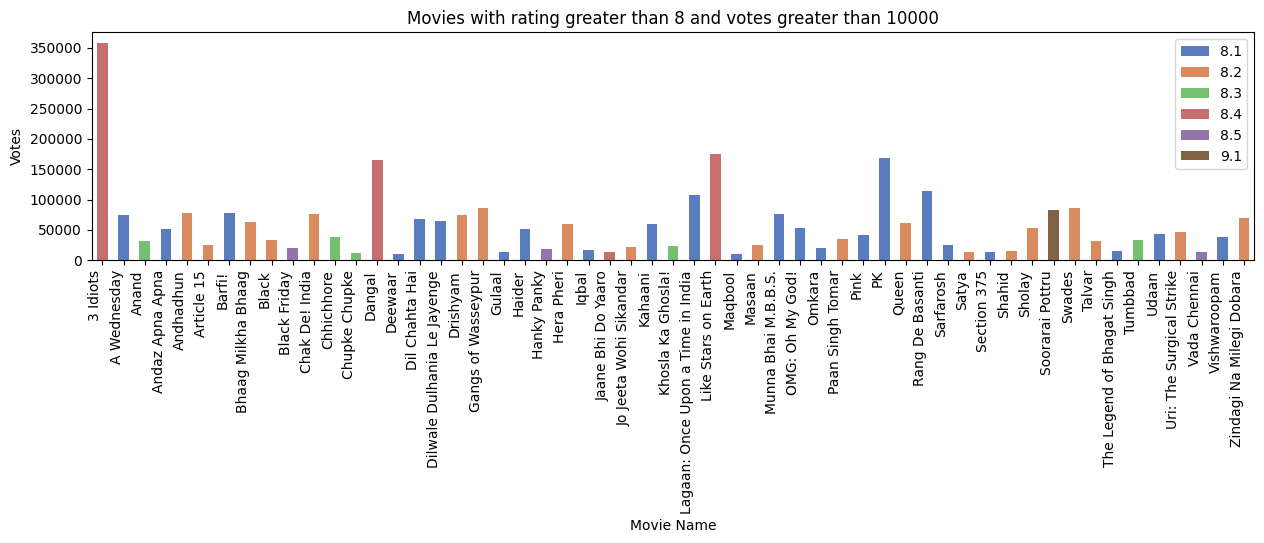

In [28]:
# import matplotlib.pyplot as plt
# import seaborn as sns
from matplotlib.ticker import FixedLocator

# Assuming 'filtered_df' is already defined and contains the data
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=filtered_df, x='Name', y='Votes', hue='Rating', dodge=False, width=0.5, palette='muted')

# Retrieve the x-tick labels and set them with FixedLocator
positions = ax.get_xticks()  # Get the current positions of the ticks
labels = [t.get_text() for t in ax.get_xticklabels()]  # Get the current labels as text
ax.xaxis.set_major_locator(FixedLocator(positions))  # Set the positions of the ticks
ax.xaxis.set_major_formatter(plt.FixedFormatter(labels))  # Set the labels for the ticks

# Now you can safely rotate the labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

ax.legend(loc='upper right')
ax.set_xlabel('Movie Name')
ax.set_ylabel('Votes')
ax.set_title('Movies with rating greater than 8 and votes greater than 10000')
plt.subplots_adjust(bottom=0.5)


###Distribution of Durations of movies by years

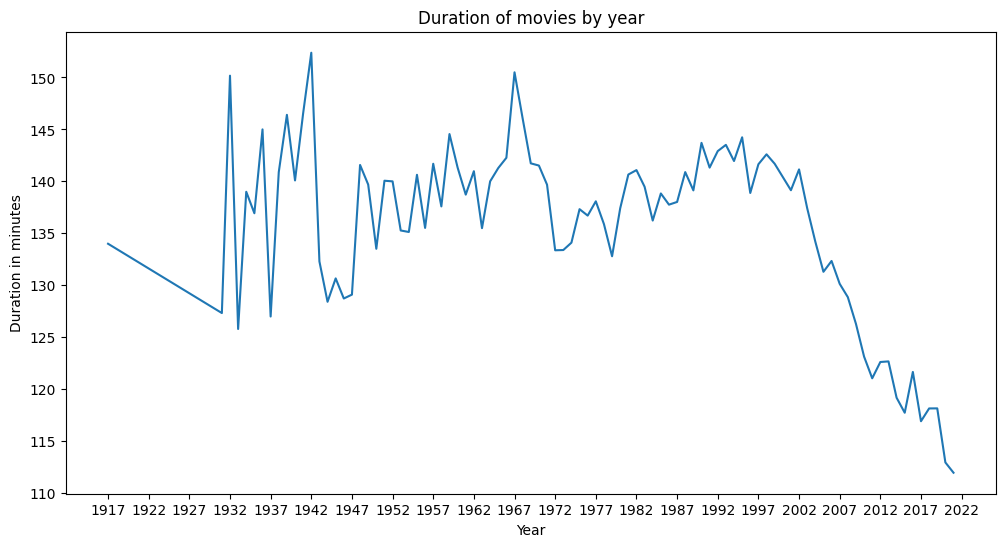

In [29]:
movie_data['Duration'] = movie_data['Duration'].astype(int)
movie_data['Year'] = movie_data['Year'].astype(int)


plt.figure(figsize=(12, 6))
sns.lineplot(data=movie_data,x='Year',y='Duration',errorbar=None)
plt.xlabel('Year')
plt.ylabel('Duration in minutes')
plt.title('Duration of movies by year')
plt.xticks(np.arange(1917,2023,5))
plt.show()

###Distribution of Number of movies each genre

In [30]:
movie_data['Genre'] = movie_data['Genre'].str.split(',')

# Create a new DataFrame with one row for each genre
genre_df = movie_data.explode('Genre')
genre_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988,134,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15505,Zulmi,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,Zulm-O-Sitam,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


<ipython-input-48-66774cdf4899>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=genre_df, x='Genre', order=order, palette='viridis')


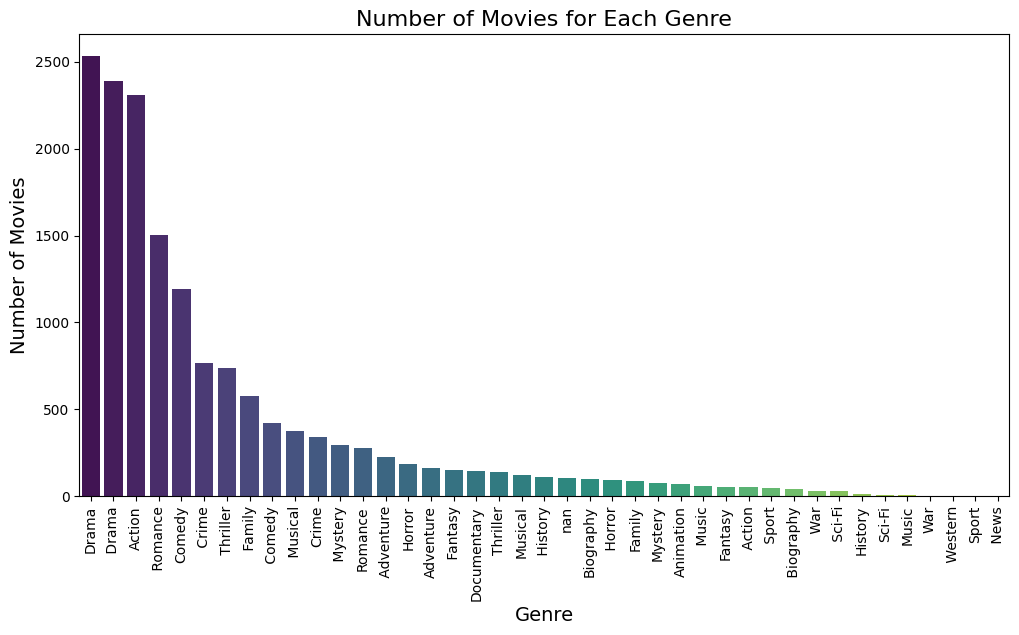

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming genre_df is your dataframe and 'Genre' is the column to be plotted
# Convert the Genre column to string type if not already
genre_df['Genre'] = genre_df['Genre'].astype(str)

# Get the order of genres based on their frequency
order = genre_df['Genre'].value_counts().index

# Remove duplicates from the order
order = order.drop_duplicates()

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the countplot without hue
sns.countplot(data=genre_df, x='Genre', order=order, palette='viridis')

# Add title and labels
plt.title('Number of Movies for Each Genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


###Distribution of Average rating of movies in each genre

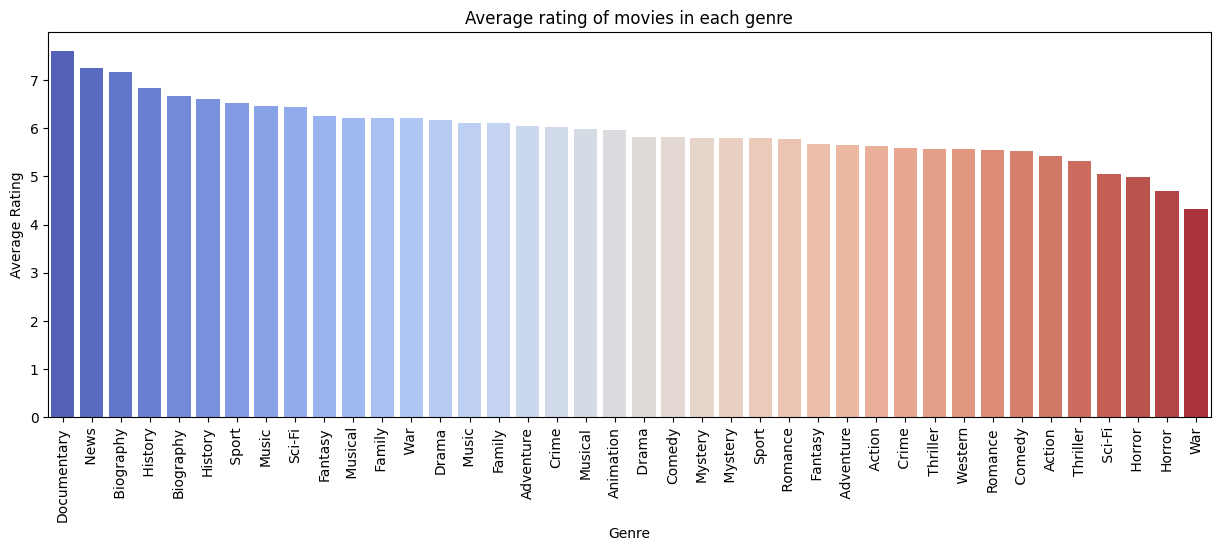

In [32]:
average_rating_by_genre = genre_df.groupby('Genre')['Rating'].mean().reset_index()
average_rating_by_genre = average_rating_by_genre.sort_values(by='Rating', ascending=False)


plt.figure(figsize=(15,5))
sns.barplot(data=average_rating_by_genre,y="Rating",x='Genre', hue = 'Genre',legend = False,palette='coolwarm')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average rating of movies in each genre')
plt.xticks(rotation=90)

plt.show()

##Featured Engineering

In [35]:
from sklearn.preprocessing import LabelEncoder

# Create separate LabelEncoders for each column
labelencoder_director = LabelEncoder()
labelencoder_actor1 = LabelEncoder()
labelencoder_actor2 = LabelEncoder()
labelencoder_actor3 = LabelEncoder()
labelencoder_genre = LabelEncoder()

trans_data = movie_data.drop(['Name'], axis=1)

# Transform Director column
trans_data['Director'] = labelencoder_director.fit_transform(movie_data['Director'])

# Transform Actor columns
trans_data['Actor 1'] = labelencoder_actor1.fit_transform(movie_data['Actor 1'])
trans_data['Actor 2'] = labelencoder_actor2.fit_transform(movie_data['Actor 2'])
trans_data['Actor 3'] = labelencoder_actor3.fit_transform(movie_data['Actor 3'])

# Transform Genre column
# Check if Genre elements are iterable and join them if they are
def process_genre(genre):
    if isinstance(genre, (list, tuple)):
        return ', '.join(genre)
    return genre

trans_data['Genre'] = labelencoder_genre.fit_transform(movie_data['Genre'].apply(process_genre))

trans_data.head()


,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,268,7.0,8,811,1782,2814,377
3,2019,110,207,4.4,35,1749,1589,890,2572
5,1997,147,177,4.7,827,2005,508,85,2449
6,2005,142,331,7.4,1086,2643,931,1388,3029
8,2012,82,367,5.6,326,174,2520,1461,1205


In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
sc_data = scaler.fit_transform(trans_data)
sc_df = pd.DataFrame(sc_data,columns=trans_data.columns)

sc_df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,0.980769,0.293333,0.620370,0.662921,0.000005,0.258363,0.698550,0.979464,0.123042
1,0.980769,0.296667,0.479167,0.370787,0.000051,0.557184,0.622893,0.309781,0.839426
2,0.769231,0.420000,0.409722,0.404494,0.001390,0.638738,0.199138,0.029586,0.799282
3,0.846154,0.403333,0.766204,0.707865,0.001828,0.841988,0.364955,0.483119,0.988577
4,0.913462,0.203333,0.849537,0.505618,0.000543,0.055432,0.987848,0.508528,0.393277


###Examine Correlation of Data

In [37]:
# correlation
corr_df = trans_data.corr()
corr_df['Rating'].sort_values(ascending=False)

Rating      1.000000
Genre       0.127672
Votes       0.126635
Actor 3     0.059636
Actor 2     0.059052
Actor 1     0.039277
Director   -0.008520
Duration   -0.030474
Year       -0.166673
Name: Rating, dtype: float64

<Axes: >

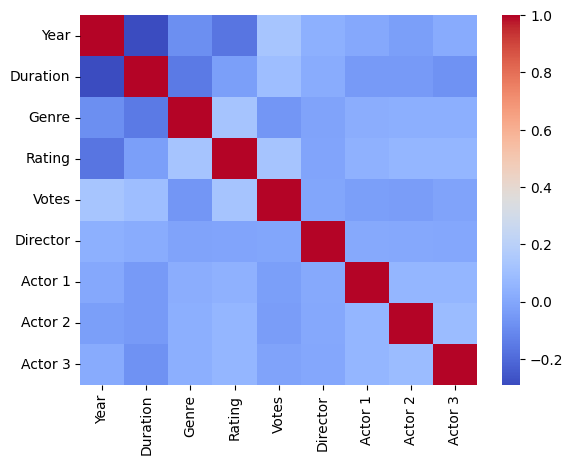

In [38]:
sns.heatmap(corr_df,annot=False,cmap="coolwarm")

###Now our transformed columns are much correlated with the target variable so we are ready to go

##Model Building

In [39]:
# Import modeling Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


# put data except Rating data
X = trans_data.drop(['Rating'],axis=1)

# Put only Rating data
y = trans_data['Rating']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [40]:
X_test = np.array(X_test)


y_pred = model.predict(X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.92175512, 5.51705232, 5.22035099, ..., 5.66758621, 6.08147015,
       5.35996193])

In [41]:
print('R2 score: ',r2_score(y_test,y_pred))
print('Mean squared error: ',mean_squared_error(y_test,y_pred))
print('Mean absolute error: ',mean_absolute_error(y_test,y_pred))

R2 score:  0.09643906656745282
Mean squared error:  1.7201084910311017
Mean absolute error:  1.0444831513128934


In [42]:
print(y_test)

9456     3.3
14816    5.3
3213     5.7
3778     7.2
5775     3.5
        ... 
9882     6.2
13537    3.2
14103    4.1
7383     5.9
15246    5.8
Name: Rating, Length: 2376, dtype: float64
